In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm

%matplotlib inline

In [2]:
well_locs = pd.read_csv(r'd:\wells.csv')


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
well_locs.columns

Index(['OBJECTID', 'APINO', 'COMPANY', 'WN', 'UNIT_LEASE', 'LEASE_NO',
       'FIELD_NAME', 'HORIZ_DIR', 'LAND_TYPE', 'COUNTY', 'COUNTYTXT', 'SEC',
       'TWP', 'T_DIR', 'RGE', 'R_DIR', 'QTR1', 'QTR2', 'longitude', 'latitude',
       'FOOT1', 'FOOT2', 'ELEV', 'ELEVKB', 'BSEC', 'BTWP', 'BT_DIR', 'BRGE',
       'BR_DIR', 'BQTR1', 'BQTR2', 'BFOOT1', 'BFOOT2', 'bottom longitude',
       'bottom latitude', 'BOTFORM', 'WELL_CLASS', 'TD', 'PB', 'RN',
       'COAL_BED', 'STATUS', 'STATUSDATE', 'CAPINO', 'FIRSTSPUD', 'SPUD',
       'FIRSTCOMP', 'COMPLETED', 'Excluded_Corrected', 'Data_source'],
      dtype='object')

In [237]:
well_locs.shape[0]

122067

In [57]:
texts = well_locs['BOTFORM'].fillna('none').values

In [80]:
import jellyfish

In [ ]:
bigD = []

for i in tqdm(range(well_locs.shape[0])):
    differences = []
    for j in range(well_locs.shape[0]):
        differences.append(jellyfish.levenshtein_distance(texts[i], texts[j]))
    bigD.append(differences)

 56%|███████████████████████████████████████▉                               | 68718/122067 [1:54:30<1:28:54, 10.00it/s]

In [198]:
dist = np.asarray(bigD)

In [135]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


In [199]:
from sklearn.cluster import DBSCAN

In [208]:
clustering = DBSCAN(eps=4, min_samples=2, metric='precomputed').fit(dist)

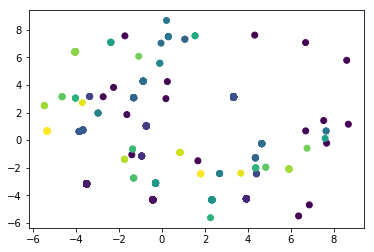

In [185]:
plt.scatter(xs, ys, c=clustering.labels_)


In [209]:
res = pd.DataFrame()
res['cluster'] = clustering.labels_
res['fm'] = texts


In [235]:
res[res['fm'].str.contains('MOR')]

,cluster,fm
3,0,MORRISON
20,0,MORRISON
40,0,MORRISON
134,0,MORRISON
135,0,MORRISON
138,0,MORRISON
156,0,MORRISON
158,0,MORRISON
159,0,MORRISON
185,0,MORRISON


In [234]:
res[res['cluster'] == 19]

,cluster,fm
554,19,DINWOODY
1004,19,DINWOODY
1615,19,DINWOODY


In [223]:
res.cluster.unique()

(33,)